In [4]:
#read in the csv to pandas
import pandas as pd

#previous files 'bird_train.csv' 'bird_train_test.csv' 'brid_train (copy).csv'
filename =  'bird_train_2_6.csv' #'bird_train_2_6.csv_all'#
filename = '/'.join( ('feature_tables',  filename) )
data = pd.read_csv(filename)
data.columns = [dd.strip('\n').strip() for dd in data.columns]
#create a copy to chop off the target values
data_copy = data.copy(deep=True)
data.tail()

,peak_Hz,peak_Q,peak_mel,fourier_freq,ampmax_n3,ampmax_n2,ampmax_n1,ampmax_0,ampmax_p1,ampmax_p2,...,max_cont1,mean_cont1,std_cont1,min_cont0,max_cont0,mean_cont0,std_cont0,num_samples,sample_rate,species
7064,3122.314453,55,2179.317341,4524,3919.042969,3251.513672,990.527344,3445.312500,925.927734,1787.255859,...,15.389675,7.776367,2.854688,6.207670,49.834140,16.812834,6.292726,63945,44100,Purple Finch
7065,990.527344,23,812.193401,1426,1119.726562,947.460938,1313.525391,1248.925781,1356.591797,1399.658203,...,20.175980,8.652228,2.964021,3.466417,27.162892,17.382492,3.395468,63945,44100,Canada Goose
7066,3380.712891,57,2363.324628,5040,1851.855469,1873.388672,4134.375000,3725.244141,3488.378906,3423.779297,...,19.210588,7.969741,3.147229,4.315509,33.913679,18.291445,3.716284,63945,44100,Red-winged Blackbird
7067,6562.500000,58,2494.548689,9504,3843.750000,3890.625000,3796.875000,6562.500000,6562.500000,6585.937500,...,18.657923,9.669164,3.335448,4.150902,35.040470,13.072596,5.367213,69600,48000,Carolina Chickadee
7068,861.328125,17,1492.932752,491,1012.060547,2088.720703,2088.720703,5232.568359,1571.923828,2088.720703,...,18.967635,9.109535,2.977942,2.866119,26.639781,10.237051,4.299918,63945,44100,Mallard


In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#most prominent frequencies seem to be below 100 Hz, check what note this corresponds to
#around this value will likely be a good value to applymy filter to
#maybe a simple solution is to just set all values below a certain frequency to 0
for n in data.peak_Hz.value_counts().items():
    print(n)

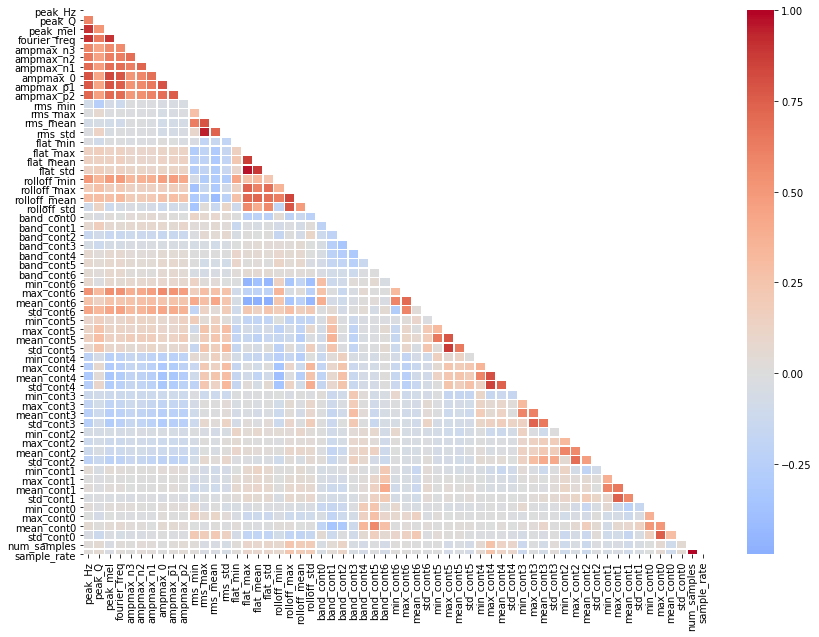

In [9]:
pearsoncorr = data.corr()

plt.figure(figsize=(14,10))

mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(pearsoncorr, mask=mask,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            center=0,
            cmap='coolwarm',
            annot=False,
            linewidth=0.5)

plt.show()

In [ ]:
kendallcorr = data.corr('kendall')

mask = np.triu(np.ones_like(corr, dtype=np.bool))

#rcParams['figure.figsize'] = 14.7,8.27
#cmap = sns.diverging_palette(60, 300, as_cmap=True) ##error in new matplotlib version
cmap = 'BrBG'
plt.figure( figsize=(11, 9) )

sns.heatmap(kendallcorr, mask=mask, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap=cmap, center=0,#"YlGnBu",
           square=True, linewidths=.5, cbar_kws={"shrink": .5},
          annot=False)

In [ ]:
#check the peak frequency distribution
data.peak_Hz.hist(bins=500)
data[ data.peak_Hz < 1420 ].species.value_counts()

In [ ]:
#check the constant Q frequency distribution
data.peak_Q.hist(bins=500)
data[ data.peak_Q < 10 ].species.value_counts()

In [ ]:
#check the mel frequency distribution
data.peak_mel.hist(bins=500)

data[ data.peak_mel < 1000 ].species.value_counts()

conv American Crow source 44100
conv American Crow source 48000
conv American Goldfinch source 44100
conv American Goldfinch source 48000
conv American Robin source 44100
conv American Robin source 48000
conv Bald Eagle source 44100
conv Bald Eagle source 48000
conv Blue Jay source 44100
conv Blue Jay source 48000
conv Brown-headed Cowbird source 44100
conv Brown-headed Cowbird source 48000
conv Canada Goose source 44100
conv Canada Goose source 48000
conv Carolina Chickadee source 44100
conv Carolina Chickadee source 48000
conv Eastern Bluebird source 44100
conv Eastern Bluebird source 48000
conv Indigo Bunting source 44100
conv Indigo Bunting source 48000
conv Mallard source 44100
conv Mallard source 48000
conv Purple Finch source 44100
conv Purple Finch source 48000
conv Red-winged Blackbird source 44100
conv Red-winged Blackbird source 48000
conv Rose-breasted Grosbeak source 44100
conv Rose-breasted Grosbeak source 48000
conv Scarlet Tanager source 44100
conv Scarlet Tanager sourc

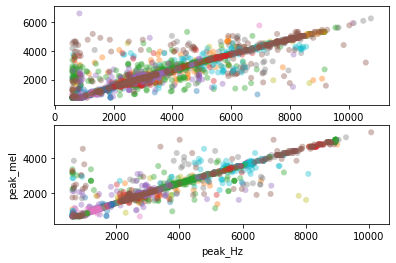

In [2]:
#plot the prominent frequency for each species vs prominent mel
import matplotlib.pyplot as plt

#spec = data.groupby('species')
key0 = 'species'
key1 = 'sample_rate'
xkey = 'peak_Hz'
ykey =  'peak_mel'
#xykey = 'peak_before_ampmax'
#ykey = ' peak_after_ampmax'

f,axs = plt.subplots(2, 1)
for conv, frame in data.groupby(key0):
    
    for source, frame2 in frame.groupby(key1):
        print('conv', conv, 'source', source)
        
        if source == 44100:
            ax = axs[0]
        elif source == 48000:
            ax = axs[1]
        #elif source == 'seo':
        #    ax = ax3
        else:
            raise ValueError('problem with source check in PlotInside!')

        ax.scatter(frame2[xkey], frame2[ykey],
            edgecolors='none', 
            label='{} {}, {} {}'.format(key0, conv, key1, source), #add label with conversion
            alpha = 0.4 )
#ax.legend()
ax.set_xlabel( xkey )
ax.set_ylabel( ykey )
plt.show();

In [ ]:
#sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

### Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
selector = RFE(estimator, 5, step=1)
selector = selector.fit(X, y)

#### random forest

#### support vector machine

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(train, target_train)
pred = clf.predict( test )

In [ ]:
from sklearn import svm
clf = svm.SVC(decision_function_shape='ovo', gamma='auto')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

#### multi output regressor

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

max_depth = 100
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=12))
regr_multirf.fit(train, target_train)
regr_multirf.score(X_test, y_test)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
regr_rf.fit(train, target_train)
regr_rf.score(X_test, y_test)

In [ ]:
for feat,imp in zip(data.columns, regr_rf.feature_importances_):
    print(feat.strip(), imp)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

tuned_parameters = [ {'kernel': ['rbf'], 'gamma': [1e-3],# 1e-4],
                      'C': [1, 10]},#, 100, 1000]},
                     {'kernel': ['linear'], 'C': [1, 10]}]#, 100, 1000]} ]

scores = ['precision', 'recall']

for score in scores:
    print(f'# Tuning hyper-parameters for {score}\n')
    
    clf = GridSearchCV(
        svm.SVC(), tuned_parameters, scoring=f'{score}_macro', n_jobs=-1 )
    clf.fit( X_train, y_train )
    print('best params found on development set\n')
    print( clf.best_params_ )
    print('\ngrid scores on development set:\n')
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean,std,params in zip( means, stds, clf.cv_results_['params'] ):
        print('{:.3f} +/-{:.3f} for {}'.format( mean, 2*std, params) )
        print('classification report:\n')
        y_true, y_pred = y_test, clf.predict( X_test )
        print( classification_report(y_true, y_pred ) )

In [3]:
#recursive feature elimination
from sklearn.feature_selection import RFE

### handling model results

In [ ]:
def GetPrediction( single_params, model, col_names, output=False ):
    unseen_test = np.array( single_params ).reshape(-1, 1)
    if output: print( unseen_test, unseen_test.shape )
    prediction = regr_rf_loaded.predict( unseen_test.transpose() )
    result = pd.DataFrame( prediction )
    result.columns = col_names
    res_sort = result.iloc[0].sort_values(axis=0, ascending=False)
    
    return res_sort


In [ ]:
def GetSplitPreds( X, y, model, nsplits=1, testsize=0.7, random=122):
    reports = []
    sss = StratifiedShuffleSplit(n_splits=nsplits, test_size=testsize, random_state=random)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #cbg.fit(X_train, y_train)
        y_pred = model.predict( X_test )
        CR = classification_report(y_test, y_pred, output_dict=outdict )
        if not outdict:
            print( CR )
        ds.append( CR )
    return y_test, y_pred, reports

y_test, y_pred, reports = GetSplitPreds( X, y, cbg)#_loaded )
GetF1Scores( y_test, y_pred )